## Group3 - Replication_1
#### Members
1. Andrea Ulloa (20172597)
2. Ana Angulo (20171627)
3. Angela Coapaza (20171636) 



# Data

We consider the same subsample of the U.S. Current Population Survey (2015). Let us load the data set.

***Variable description***

- occ : occupational classification
- ind : industry classification
- lwage : log hourly wage
- sex : gender (1 female) (0 male)
- shs : some high school
- hsg : High school graduated
- scl : Some College
- clg: College Graduate
- ad: Advanced Degree
- ne: Northeast
- mw: Midwest
- so: South
- we: West
- exp1: experience

In [1]:
pip install pyreadr 

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import relevant packages
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
# Extracting the data
total_data  = pd.read_csv(r'../../data/wage2015_subsample_inference.csv')
total_data['occ']=pd.Categorical(total_data.occ)
total_data['occ2']=pd.Categorical(total_data.occ2)
total_data['ind']=pd.Categorical(total_data.ind)
total_data['ind2']=pd.Categorical(total_data.ind2)

#Determining the dimension of our data set.
total_data.shape
# There are 5150 obs and 21 features

(5150, 21)

Focus on the subset of college-educated workers (scl, clg variables). Thus, we will filter the observations that are at least one year old or have finished college.

In [4]:
print(total_data['shs'].value_counts()) 
print(total_data['hsg'].value_counts()) 
# In our new base we should have 3068 observations

0.0    5030
1.0     120
Name: shs, dtype: int64
0.0    3894
1.0    1256
Name: hsg, dtype: int64


In [16]:
data = total_data[(total_data['shs'] == 1) | (total_data['hsg'] == 1)]
data

,rownames,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,...,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
2,15,11.057692,2.403126,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,18.0,3.24,5.832,10.4976,6260.0,19,770.0,4
6,43,19.230769,2.956512,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,42.0,17.64,74.088,311.1696,5120.0,17,7280.0,14
7,44,19.230769,2.956512,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,37.0,13.69,50.653,187.4161,5240.0,17,5680.0,9
8,47,12.000000,2.484907,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,31.0,9.61,29.791,92.3521,4040.0,13,8590.0,19
10,73,17.307692,2.851151,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,7.0,0.49,0.343,0.2401,4020.0,13,8270.0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5135,32580,12.980769,2.563469,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,15.0,2.25,3.375,5.0625,2010.0,6,9370.0,22
5137,32590,13.461538,2.599837,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,8.0,0.64,0.512,0.4096,4720.0,16,8590.0,19
5141,32599,22.596154,3.117780,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,15.0,2.25,3.375,5.0625,9620.0,22,5390.0,9
5142,32603,16.826923,2.822980,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,11.0,1.21,1.331,1.4641,7150.0,20,8770.0,21


### Describing the main variables 

Let's go to **describe the main variables** that we will use later to obtain the causal effect of sex on income: 

wage, log-wage, sex, some college, college graduate, avdanced degree, experience

In [43]:
data.describe()
#"lwage","sex","scl","clg","ne","mw","so","we","exp1" - to regression
#"wage, lwage","sex","scl","clg","ne","mw","so","we","exp1" - to describe

,rownames,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,so,we,ne,exp1,exp2,exp3,exp4
count,3068.000000,3068.000000,3068.000000,3068.000000,3068.0,3068.0,3068.000000,3068.000000,3068.0,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000
mean,15716.577249,23.657384,3.000022,0.470991,0.0,0.0,0.466754,0.533246,0.0,0.265971,0.285854,0.221643,0.226532,12.700945,2.676344,7.133814,21.345586
std,9752.832944,19.367700,0.544510,0.499239,0.0,0.0,0.498975,0.498975,0.0,0.441921,0.451894,0.415420,0.418655,10.312857,3.766616,13.285832,47.858967
min,10.000000,3.021978,1.105912,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.010000,0.001000,0.000100
25%,7262.000000,14.170040,2.651130,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,4.500000,0.202500,0.091125,0.041006
50%,15089.500000,19.230769,2.956512,0.000000,0.0,0.0,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,9.000000,0.810000,0.729000,0.656100
75%,24595.500000,27.990239,3.331855,1.000000,0.0,0.0,1.000000,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,19.000000,3.610000,6.859000,13.032100
max,32624.000000,490.196078,6.194805,1.000000,0.0,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,42.500000,18.062500,76.765625,326.253906


In [45]:
#Creando una variable string para los graficos
data['sexo']="female"
data.loc[data[ 'sex' ] == 0,'sexo'] = "male"
data.head()

C:\Users\ANA\AppData\Local\Temp/ipykernel_1576/2382442191.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sexo']="female"
C:\Users\ANA\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,rownames,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,...,exp2,exp3,exp4,occ,occ2,ind,ind2,educ,sexo,place
2,15,11.057692,2.403126,0.0,some high school,1.0,0.0,0.0,0.0,0.0,...,3.24,5.832,10.4976,6260.0,19,770.0,4,NaN,male,Northeast
6,43,19.230769,2.956512,1.0,some high school,1.0,0.0,0.0,0.0,0.0,...,17.64,74.088,311.1696,5120.0,17,7280.0,14,NaN,female,Northeast
7,44,19.230769,2.956512,0.0,some high school,1.0,0.0,0.0,0.0,0.0,...,13.69,50.653,187.4161,5240.0,17,5680.0,9,NaN,male,Northeast
8,47,12.000000,2.484907,1.0,some high school,1.0,0.0,0.0,0.0,0.0,...,9.61,29.791,92.3521,4040.0,13,8590.0,19,NaN,female,Northeast
10,73,17.307692,2.851151,1.0,some high school,1.0,0.0,0.0,0.0,0.0,...,0.49,0.343,0.2401,4020.0,13,8270.0,18,NaN,female,Northeast


In [46]:
data['place']="South"

data.loc[data[ 'ne' ] == 1,'place'] = "Northeast"
data.loc[data[ 'mw' ] == 1,'place'] = "Midwest"
data.loc[data[ 'we' ] == 1,'place'] = "West"
data

C:\Users\ANA\AppData\Local\Temp/ipykernel_1576/3052232993.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['place']="South"
C:\Users\ANA\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,rownames,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,...,exp2,exp3,exp4,occ,occ2,ind,ind2,educ,sexo,place
2,15,11.057692,2.403126,0.0,some high school,1.0,0.0,0.0,0.0,0.0,...,3.24,5.832,10.4976,6260.0,19,770.0,4,NaN,male,Northeast
6,43,19.230769,2.956512,1.0,some high school,1.0,0.0,0.0,0.0,0.0,...,17.64,74.088,311.1696,5120.0,17,7280.0,14,NaN,female,Northeast
7,44,19.230769,2.956512,0.0,some high school,1.0,0.0,0.0,0.0,0.0,...,13.69,50.653,187.4161,5240.0,17,5680.0,9,NaN,male,Northeast
8,47,12.000000,2.484907,1.0,some high school,1.0,0.0,0.0,0.0,0.0,...,9.61,29.791,92.3521,4040.0,13,8590.0,19,NaN,female,Northeast
10,73,17.307692,2.851151,1.0,some high school,1.0,0.0,0.0,0.0,0.0,...,0.49,0.343,0.2401,4020.0,13,8270.0,18,NaN,female,Northeast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5135,32580,12.980769,2.563469,0.0,some high school,1.0,0.0,0.0,0.0,0.0,...,2.25,3.375,5.0625,2010.0,6,9370.0,22,NaN,male,West
5137,32590,13.461538,2.599837,1.0,some high school,1.0,0.0,0.0,0.0,0.0,...,0.64,0.512,0.4096,4720.0,16,8590.0,19,NaN,female,West
5141,32599,22.596154,3.117780,0.0,some high school,1.0,0.0,0.0,0.0,0.0,...,2.25,3.375,5.0625,9620.0,22,5390.0,9,NaN,male,West
5142,32603,16.826923,2.822980,0.0,some high school,1.0,0.0,0.0,0.0,0.0,...,1.21,1.331,1.4641,7150.0,20,8770.0,21,NaN,male,West


In [35]:
data['shs']="some high school"

data.loc[data[ 'hsg' ] == 0,'educ'] = "High school graduate"
data.head()

C:\Users\ANA\AppData\Local\Temp/ipykernel_1576/552887200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['shs']="some high school"
C:\Users\ANA\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,rownames,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,...,exp2,exp3,exp4,occ,occ2,ind,ind2,educ,sexo,place
2,15,11.057692,2.403126,0.0,some high school,1.0,0.0,0.0,0.0,0.0,...,3.24,5.832,10.4976,6260.0,19,770.0,4,NaN,male,Northeast
6,43,19.230769,2.956512,1.0,some high school,1.0,0.0,0.0,0.0,0.0,...,17.64,74.088,311.1696,5120.0,17,7280.0,14,NaN,female,Northeast
7,44,19.230769,2.956512,0.0,some high school,1.0,0.0,0.0,0.0,0.0,...,13.69,50.653,187.4161,5240.0,17,5680.0,9,NaN,male,Northeast
8,47,12.000000,2.484907,1.0,some high school,1.0,0.0,0.0,0.0,0.0,...,9.61,29.791,92.3521,4040.0,13,8590.0,19,NaN,female,Northeast
10,73,17.307692,2.851151,1.0,some high school,1.0,0.0,0.0,0.0,0.0,...,0.49,0.343,0.2401,4020.0,13,8270.0,18,NaN,female,Northeast


In [36]:
#pip install matplotlib
import matplotlib.pyplot as plt
import seaborn as sns



#### Wage and lwage

The following graph shows the hourly wage density. As can be seen, the distribution has a large tail to the right (positive asymmetric distribution), that is, there are unusually high values. While most observations are concentrated in values less than 100.

C:\Users\ANA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='wage', ylabel='Density'>

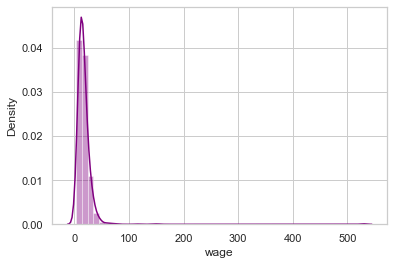

In [37]:
from seaborn import distplot

distplot(data.wage, color='purple')

Due to the problem of outlayers, the variable of the logarithm of wages is created. This corrects the asymmetry presented by the original data.

C:\Users\ANA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lwage', ylabel='Density'>

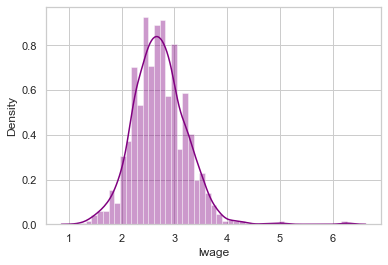

In [38]:
from seaborn import distplot

distplot(data.lwage,color='purple')

#### lwage and sex by grade

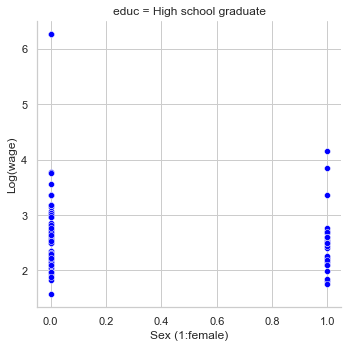

In [39]:
g = sns.relplot(data=data,  x="sex", y="lwage", col="educ", color='blue')
g.set_axis_labels("Sex (1:female)", "Log(wage)")

This graph shows that in the group of university graduates, there are some (few) who earn a higher salary than women. It can also be seen that there is less income variability among women than among men. On the other hand, in the group of some college we observe that there are unusually high observations in both the men's and women's groups, with a man being the one with the highest salary. It's interesting that among the unusual values there are people who have not yet finished university, but have higher incomes than those who did finish university.

Text(0, 0.5, ' ')

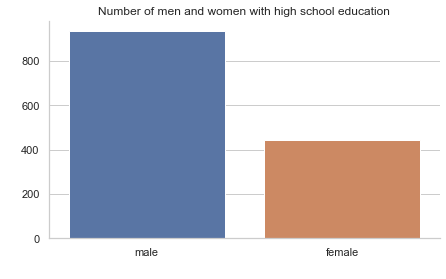

In [47]:
# The numbers of men and women in our sample.

sns.set( style="whitegrid" )


fig, ax = plt.subplots( figsize=(7,4) )

x = sns.countplot( x="sexo", data=data )

sns.despine()
plt.title('Number of men and women with high school education')
plt.xlabel(' ')
plt.ylabel(' ')

As we can see, there are more men with high school degrees than women in our sample of unmarried workers.

In [48]:
# How many women have some college compared to men?
# How many women have completed college compared to men?

data_scl = data[data['shs']==1]
data_clg = data[data['hsg']==1]

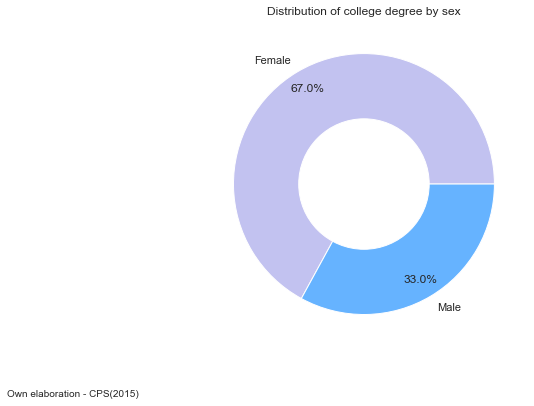

In [50]:
base2 = data_clg.groupby([ 'sex' ]).count()

labels=['Female', 'Male']
plt.figure(figsize=(10, 6))

ax = plt.pie(base2['lwage'], labels=labels,
        autopct='%1.1f%%', pctdistance=0.85, colors=['#c2c2f0','#66b3ff'])
  
# centroid size and color

center_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()

fig.gca().add_artist(center_circle)
  
plt.title('Distribution of college degree by sex')

# Adding notes

txt="Own elaboration - CPS(2015)"  
plt.figtext(0.2, 0.01, txt, wrap=True, horizontalalignment='right', fontsize=10)

plt.show()

In both subsamples we can observe the percentage is always lower than that of men (as happens in the total sample). However, in the college degree group, the representation of women increases.

#### lwage and place of residence

<AxesSubplot:xlabel='place', ylabel='Count'>

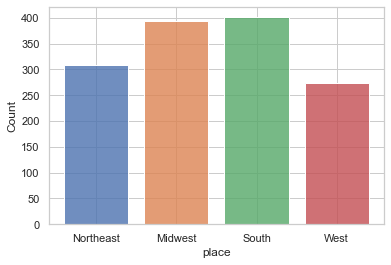

In [51]:
#f, axs = plt.subplots(1, 1, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
#sns.scatterplot(data=data, x="exp1", y="lwage", hue="sexo", ax=axs[0])
sns.histplot(data=data, x="place", hue="place", shrink=.8, alpha=.8, legend=False)
#f.tight_layout()

# The number of college-educated workers is higher in the midwest and south
# where there are fewer is in the west

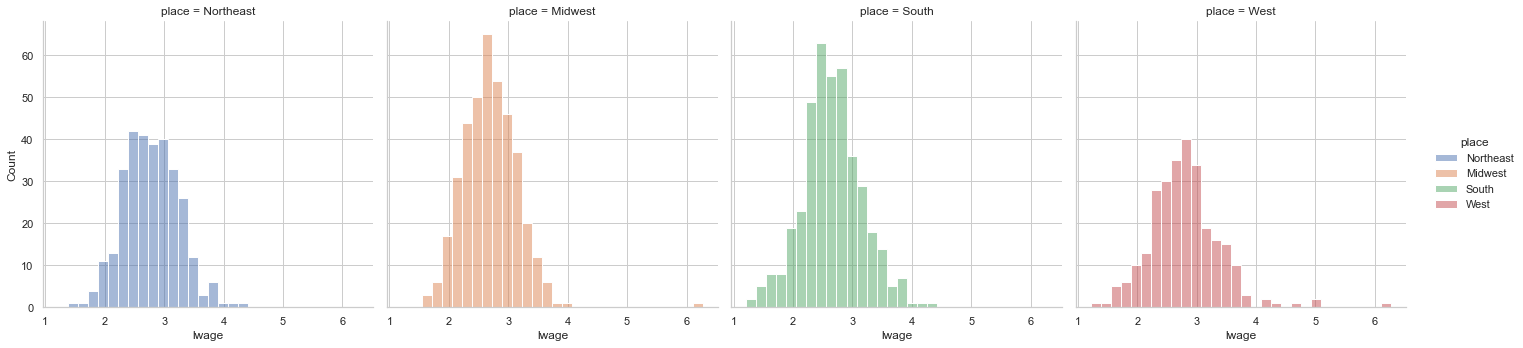

In [52]:
sns.displot(data=data, x="lwage", hue="place", col="place",bins=30)

The previous graph shows the distribution of the logarithm of salaries by place. We can see that the male observation with the highest income lives in the west.

#### Experience, Sex and lwage

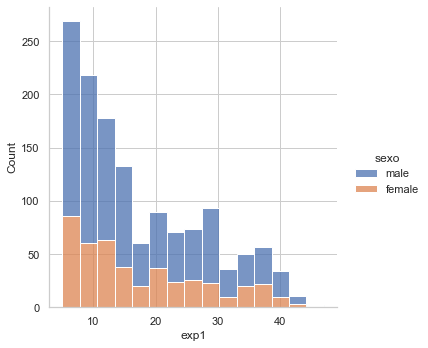

In [53]:
sns.displot(data=data, x="exp1", hue="sexo", multiple="stack")

There is a greater number of people with experience between 0 and 10 years. After 10 years, the population with a lot of experience is reduced. It can be seen that both women and men are roughly equally represented in each experience group, but it seems that generally men slightly outnumber women.

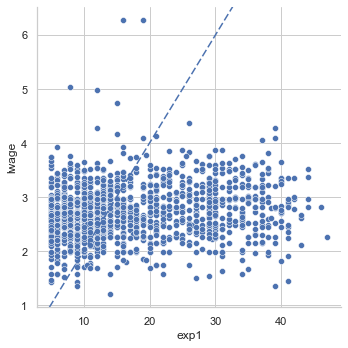

In [54]:
# This 
g = sns.relplot(data=data, x="exp1", y="lwage")
g.ax.axline(xy1=(10, 2), slope=.2, color="b", dashes=(5, 2))

This scatter plot does not tell us much about the relationship between experience and salary. We can see that the relationship is positive within this college-educated group, but that relationship is basically made up of unusual observations. It is interesting that for those between 10 and 30 years old, the relationship of more experience plus salary per hour is fulfilled, but after 30 years of experience, salaries are reduced.

In [56]:
#base = data_scl.groupby([ 'sexo' ]).count()
#base

,rownames,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,...,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
sexo,,,,,,,,,,,,,,,,,,,,,
hombre,782,782,782,782,782,782,782,782,782,782,...,782,782,782,782,782,782,782,782,782,782
mujer,650,650,650,650,650,650,650,650,650,650,...,650,650,650,650,650,650,650,650,650,650


In [69]:
# plot pie

#base = data_scl.groupby('sexo').size()

#base.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%.2f %%', colors= ['#c2c2f0','#66b3ff'])
#plt.title("Distribución de los some college por sexo")
#plt.ylabel("")
#plt.show()



In [ ]:
# hacer un scatter plot con años de experiencia e ingresos


# Prediction

### An Inferencial Problem: The College-Educated Wage Gap
Using the data from the March Supplement of the U.S. Current Population Survey (2015) , in  this lab, we are going to focus in  payments of the college-educated workers and answer the following inference question:

What is the difference in predicted wages between workers with some high school education (shs) versus high school graduate workers(clg)?

To predict the High School-Educated Wage Gap, we consider the following log-linear regression model:

\begin{align}
\log(Y) &= \beta'X + \epsilon\\
\end{align}

This will enable us to predict wages using various characteristics of workers and to assess the predictive performance using the (adjusted) sample MSE, the (adjusted) sample $R^2$ and the out-of-sample MSE and $R^2$.

We employ two different specifications for prediction:

1. Basic Model:  consists of a set of raw regressors (e.g. gender, experience, education indicators, occupation and industry indicators, regional indicators). That is, $sex + exp1 + shs + hsg+ scl + clg + mw + so + we + occ2+ ind2$.
2. Flexible Model:  consists of all raw regressors from the basic model (excepto for sex) plus transformations  squared. That is $(exp1+exp2+exp3+exp4+shs+hsg+occ2+ind2+mw+so+we)^2$

In [56]:
# Import packages for OLS regression
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [59]:
Y = np.log2(data['wage']) 
n = len(Y)
z = data.loc[:, ~data.columns.isin(['wage', 'lwage','Unnamed: 0'])]
z  

,rownames,sex,shs,hsg,scl,clg,ad,mw,so,we,...,exp2,exp3,exp4,occ,occ2,ind,ind2,educ,sexo,place
2,15,0.0,some high school,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.24,5.832,10.4976,6260.0,19,770.0,4,NaN,male,Northeast
6,43,1.0,some high school,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17.64,74.088,311.1696,5120.0,17,7280.0,14,NaN,female,Northeast
7,44,0.0,some high school,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13.69,50.653,187.4161,5240.0,17,5680.0,9,NaN,male,Northeast
8,47,1.0,some high school,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.61,29.791,92.3521,4040.0,13,8590.0,19,NaN,female,Northeast
10,73,1.0,some high school,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.49,0.343,0.2401,4020.0,13,8270.0,18,NaN,female,Northeast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5135,32580,0.0,some high school,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,2.25,3.375,5.0625,2010.0,6,9370.0,22,NaN,male,West
5137,32590,1.0,some high school,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.64,0.512,0.4096,4720.0,16,8590.0,19,NaN,female,West
5141,32599,0.0,some high school,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,2.25,3.375,5.0625,9620.0,22,5390.0,9,NaN,male,West
5142,32603,0.0,some high school,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.21,1.331,1.4641,7150.0,20,8770.0,21,NaN,male,West


In [60]:
p = z.shape[1] #number of regressors

print("Number of observation:", n, '\n')
print( "Number of raw regressors:", p)

Number of observation: 1376 

Number of raw regressors: 22


In [61]:
Z_subset = data.loc[:, data.columns.isin(["lwage","sex","shs","hsg","scl","clg","ad","mw","so","we","ne","exp1"])]
table = Z_subset.mean(axis=0)
table

C:\Users\ANA\AppData\Local\Temp/ipykernel_1576/2538188399.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  table = Z_subset.mean(axis=0)


lwage     2.718562
sex       0.321948
hsg       0.912791
scl       0.000000
clg       0.000000
ad        0.000000
mw        0.286337
so        0.291424
we        0.198401
ne        0.223837
exp1     17.190044
dtype: float64

In [63]:
# 1. basic model 
basic = 'lwage ~ sex + exp1 + shs + hsg+ scl + clg + mw + so + we + occ2+ ind2'
basic_results = smf.ols(basic , data=data).fit()
print(basic_results.summary()) # estimated coefficients
#print( "Number of regressors in the basic model:",len(basic_results.params)

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     6.212
Date:                Sat, 16 Apr 2022   Prob (F-statistic):           9.07e-33
Time:                        12:36:48   Log-Likelihood:                -872.87
No. Observations:                1376   AIC:                             1842.
Df Residuals:                    1328   BIC:                             2093.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7519      0.145     19.026      0.0

In [65]:
# 2. flexible model
flex = 'lwage ~ (exp1+exp2+exp3+exp4+shs+hsg+scl+clg+occ2+ind2+mw+so+we)**2'
flex_results_0 = smf.ols(flex , data=data)
flex_results = smf.ols(flex , data=data).fit()
print(flex_results.summary()) # estimated coefficients
#print( "Number of regressors in the basic model:",len(flex_results.params), '

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     1.840
Date:                Sat, 16 Apr 2022   Prob (F-statistic):           2.24e-15
Time:                        12:39:11   Log-Likelihood:                -522.96
No. Observations:                1376   AIC:                             2034.
Df Residuals:                     882   BIC:                             4616.
Df Model:                         493                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                11.48

### Coefplots

In [160]:
param ={'nocontrol_model':-0.08150856,'control_model':-0.05306234,'partialling-out':-0.05306234}
pd_param=pd.DataFrame([[key, param[key]] for key in param.keys()], columns=['Type_model','Parameters'])
pd_param

,Type_model,Parameters
0,nocontrol_model,-0.081509
1,control_model,-0.053062
2,partialling-out,-0.053062


In [161]:
df_append=pd.concat([df_noc,df_con,df_par]).reset_index()
df_append

,index,0,1
0,sex,-0.120022,-0.042995
1,sex,-0.091010,-0.015115
2,r_D,-0.089571,-0.016554


In [162]:
err_series = pd_param['Parameters'][:]-df_append[0]
err_series.values


array([0.03851366, 0.03794774, 0.03650836])

In [163]:
r = pd_param['Parameters']
r
pd_param['Type_model'].values

array(['nocontrol_model', 'control_model', 'partialling-out'],
      dtype=object)

In [164]:
coef_df = pd.DataFrame({'coef': pd_param['Parameters'].values,
                        'err': err_series.values,
                        'varname': pd_param['Type_model'].values
                       })
coef_df


,coef,err,varname
0,-0.081509,0.038514,nocontrol_model
1,-0.053062,0.037948,control_model
2,-0.053062,0.036508,partialling-out


C:\Users\Andrea\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  import sys


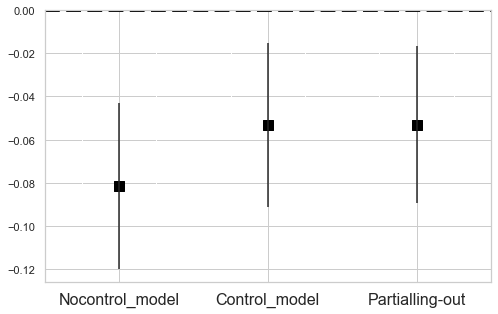

In [165]:
fig, ax = plt.subplots(figsize=(8, 5))
coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
           marker='s', s=120, 
           y=coef_df['coef'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(['Nocontrol_model','Control_model','Partialling-out'], 
                       rotation=0, fontsize=16)


# Two cases of Partialling-Out using lasso.